In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

# Data Analysis and Preprocessing

In [3]:
#importing datasets  
df=pd.read_csv(r'C:\Users\User\Desktop\Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

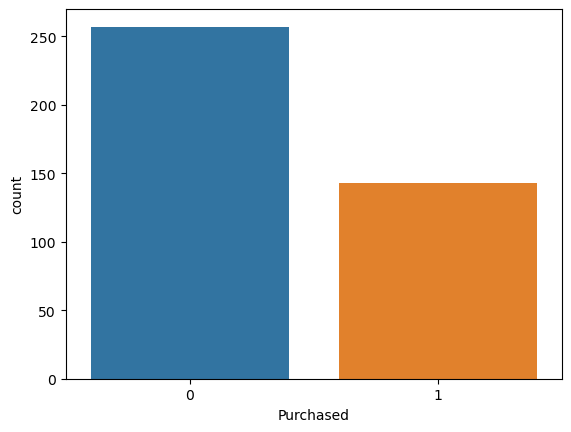

In [6]:
sns.countplot(x='Purchased', data=df)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


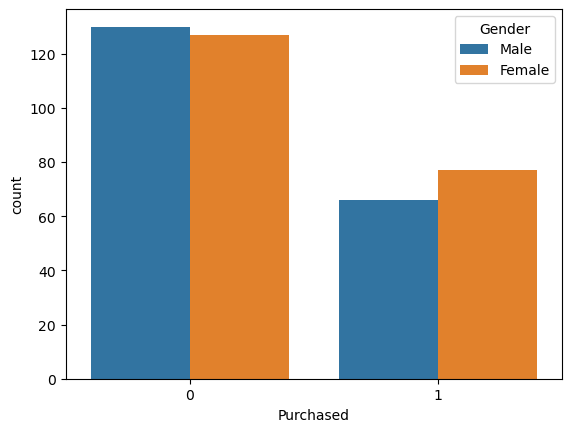

In [8]:
sns.countplot(x='Purchased', data=df, hue='Gender')
plt.show()

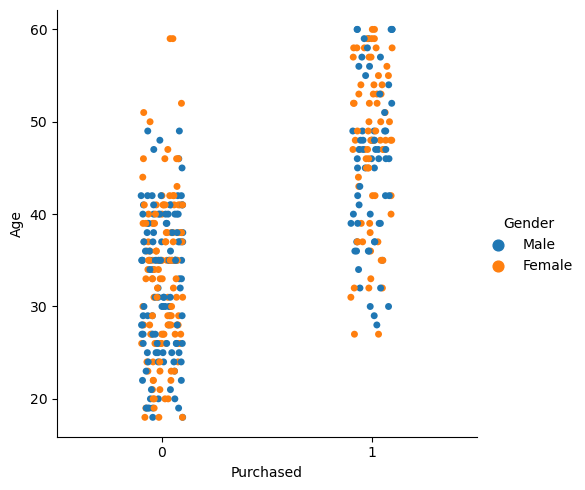

In [9]:
sns.catplot(x='Purchased', y='Age', data=df, hue='Gender')
plt.show()

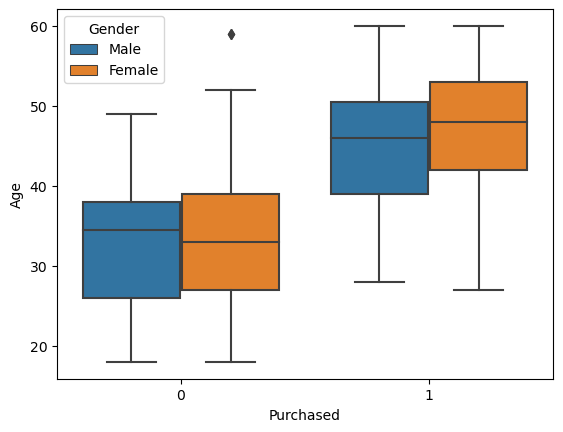

In [10]:
sns.boxplot(x='Purchased', y='Age', data=df, hue='Gender')
plt.show()

In [11]:
gender=pd.get_dummies(df['Gender'],drop_first=True)
df=pd.concat([df,gender],axis=1)

In [12]:
df.drop(['Gender'],axis=1,inplace=True)

In [13]:
x=df[['Age','EstimatedSalary','Male']]
y=df['Purchased']

# Transforming using Standard Scalar

In [14]:

Scaler=StandardScaler()
Scaler.fit(x)

StandardScaler()

In [15]:
scaled_features=Scaler.transform(x)
scaled_features

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [16]:
df_feat=pd.DataFrame(scaled_features,columns=x.columns)
df_feat.head()

,Age,EstimatedSalary,Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


# Dividing the Data in test train split

In [17]:

x_train,x_test,y_train,y_test=train_test_split(scaled_features,y,test_size=0.2)

# Building Logistic Regression Model

In [18]:

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred=knn.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

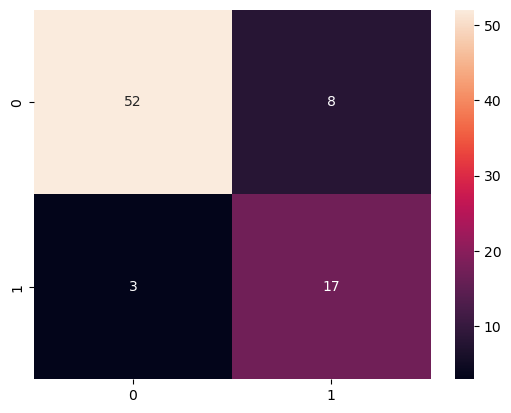

In [20]:

cf_matrix=confusion_matrix(y_test,pred)
sns.heatmap(cf_matrix, annot=True)

# Finding Accuracy Score

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.90        60
           1       0.68      0.85      0.76        20

    accuracy                           0.86        80
   macro avg       0.81      0.86      0.83        80
weighted avg       0.88      0.86      0.87        80



# Building Random Forest  Model


In [22]:
rf_clf = RandomForestClassifier(max_depth=4)
rf_clf.fit(x_train, y_train)
y_pre=rf_clf.predict(x_test)


<AxesSubplot:>

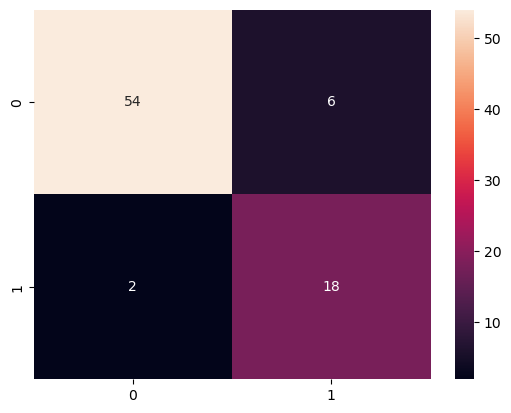

In [23]:
cm=confusion_matrix(y_test,y_pre)
sns.heatmap(cm,annot=True)

# Finding Accuracy Score

In [24]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        60
           1       0.75      0.90      0.82        20

    accuracy                           0.90        80
   macro avg       0.86      0.90      0.87        80
weighted avg       0.91      0.90      0.90        80

